**ME391: Final Project**

Christian Hollar

6 Input Keras Model for TSLA Price Prediction

Stock Price Settings: 2 Year Period & 1 Hour Interval Closing Prices

- Input 1: LSTM Tesla
- Input 2: LSTM Apple
- Input 3: LSTM Microsoft
- Input 4: LSTM Google
- Input 5: LSTM Amazon
- Input 6: Dense Technical Indicators

Stock Index LSTM:
Previous 100 Price Values -> Next Price Value

Technical Indicators:
- RSI
- Stochastic RSI
- Triple Exponential Moving Average
- MACD
- VWMA

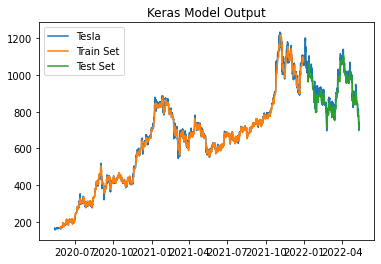

![image.png]()

Required installs:

In [1]:
!pip install yfinance
!pip install stockstats

Imports:

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6


import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from stockstats import StockDataFrame

Using the yfinance library, download the stock of choice:
Top 5 Tech Stocks
- AAPL
- MSFT
- GOOG
- AMZN
- TSLA


In [3]:
df = yf.download(
        tickers = "AAPL MSFT GOOG AMZN TSLA",
        period = "5y",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )
df = df.dropna()
df.head(), df.shape

[*********************100%***********************]  5 of 5 completed


(                  AMZN                                               \
                   Open        High         Low       Close   Volume   
 Date                                                                  
 2017-05-15  958.729980  963.150024  956.059998  957.969971  4270600   
 2017-05-16  961.000000  970.059998  960.909973  966.070007  3126100   
 2017-05-17  954.700012  960.400024  944.119995  944.760010  5145600   
 2017-05-18  944.799988  962.750000  944.760010  958.489990  3939300   
 2017-05-19  962.840027  968.919983  959.719971  959.840027  3972100   
 
                  AAPL                                              ...  \
                  Open       High        Low      Close     Volume  ...   
 Date                                                               ...   
 2017-05-15  36.922346  37.073812  36.695148  36.848980  104038800  ...   
 2017-05-16  36.905778  36.934177  36.617044  36.794544   80194000  ...   
 2017-05-17  36.351977  36.581544  35.431345  3

Using stockstats import, download the following technical indicators:
- RSI
- Stochastic RSI
- Triple Exponential Moving Average
- MACD
- VWMA

https://github.com/jealous/stockstats

In [4]:
df1 = StockDataFrame.retype(df['TSLA'][["Open", "Close", "High", "Low", "Volume"]])
df1.head()

,open,close,high,low,volume
Date,,,,,
2017-05-15,63.675999,63.175999,64.040001,62.506001,38110000
2017-05-16,63.518002,63.402000,64.012001,63.028000,20762500
2017-05-17,62.877998,61.222000,62.925999,61.099998,33559500
2017-05-18,61.400002,62.612000,62.787998,61.062000,28269000
2017-05-19,63.099998,62.166000,63.299999,62.040001,23438000


In [5]:
df1['rsi']
df1['stochrsi']
df1['tema']
df1['macd']
df1['vwma']
df1.head(), df1.shape

(                 open      close       high        low    volume     rs_14  \
 Date                                                                         
 2017-05-15  63.675999  63.175999  64.040001  62.506001  38110000       NaN   
 2017-05-16  63.518002  63.402000  64.012001  63.028000  20762500       inf   
 2017-05-17  62.877998  61.222000  62.925999  61.099998  33559500  0.096265   
 2017-05-18  61.400002  62.612000  62.787998  61.062000  28269000  0.782927   
 2017-05-19  63.099998  62.166000  63.299999  62.040001  23438000  0.632785   
 
                    rsi      rsi_14   stochrsi       tema      macd     macds  \
 Date                                                                           
 2017-05-15         NaN         NaN        NaN  63.175999  0.000000  0.000000   
 2017-05-16  100.000000  100.000000        NaN  63.387536  0.005071  0.002817   
 2017-05-17    8.781219    8.781219   0.000000  61.553095 -0.061141 -0.023395   
 2017-05-18   43.912455   43.912455  38.

In [6]:
df1['AAPL'] = df['AAPL']['Close']
df1['MSFT'] = df['MSFT']['Close']
df1['GOOG'] = df['GOOG']['Close']
df1['AMZN'] = df['AMZN']['Close']
df1 = df1.dropna()
df1.head()

,open,close,high,low,volume,rs_14,rsi,rsi_14,stochrsi,tema,macd,macds,macdh,vwma,AAPL,MSFT,GOOG,AMZN
Date,,,,,,,,,,,,,,,,,,
2017-05-17,62.877998,61.222000,62.925999,61.099998,33559500,0.096265,8.781219,8.781219,0.000000,61.553095,-0.061141,-0.023395,-0.037746,62.753115,35.559143,63.352615,919.619995,944.760010
2017-05-18,61.400002,62.612000,62.787998,61.062000,28269000,0.782927,43.912455,43.912455,38.513161,62.224199,-0.039571,-0.028875,-0.010696,62.612798,36.101105,63.568569,930.239990,958.489990
2017-05-19,63.099998,62.166000,63.299999,62.040001,23438000,0.632785,38.754942,38.754942,32.859157,62.147647,-0.044765,-0.033602,-0.011163,62.594781,36.224171,63.549767,934.010010,959.840027
2017-05-22,62.560001,62.070000,62.874001,61.360001,21646000,0.605853,37.727780,37.727780,31.733116,62.064567,-0.051151,-0.038358,-0.012792,62.530353,36.444271,64.263283,941.859985,970.669983
2017-05-23,62.091999,60.771999,62.146000,60.695999,21592000,0.374045,27.222198,27.222198,20.216208,61.097765,-0.113166,-0.057290,-0.055876,62.377591,36.399307,64.479218,948.820007,971.539978


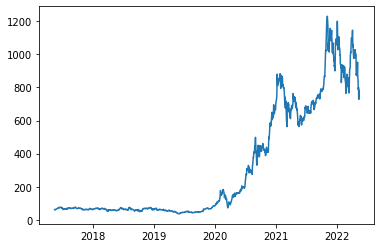

In [7]:
plt.plot(df1['close'])

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
dftsla = scaler.fit_transform(np.array(df1['close']).reshape(-1,1))

dfaapl = scaler.fit_transform(np.array(df1['AAPL']).reshape(-1,1))
dfmsft = scaler.fit_transform(np.array(df1['MSFT']).reshape(-1,1))
dfgoog = scaler.fit_transform(np.array(df1['GOOG']).reshape(-1,1))
dfamzn = scaler.fit_transform(np.array(df1['AMZN']).reshape(-1,1))

rsi = scaler.fit_transform(np.array(df1['rsi']).reshape(-1,1))
stochrsi = scaler.fit_transform(np.array(df1['stochrsi']).reshape(-1,1))
tema = scaler.fit_transform(np.array(df1['tema']).reshape(-1,1))
macd = scaler.fit_transform(np.array(df1['macd']).reshape(-1,1))
vwma = scaler.fit_transform(np.array(df1['vwma']).reshape(-1,1))

Declare the size of the training set to be approximatley 80% of the entire data set under evaluation:

In [9]:
training_size = round(len(dftsla)*0.8)
test_size = len(dftsla) - training_size
train_data, test_data = dftsla[:training_size,:],dftsla[training_size:,:1]

train_aapl, test_aapl = dfaapl[:training_size,:],dfaapl[training_size:,:1]
train_msft, test_msft = dfmsft[:training_size,:],dfmsft[training_size:,:1]
train_goog, test_goog = dfgoog[:training_size,:],dfgoog[training_size:,:1]
train_amzn, test_amzn = dfamzn[:training_size,:],dfamzn[training_size:,:1]

train_rsi, test_rsi = rsi[:training_size,:],rsi[training_size:,:1]
train_stochrsi, test_stochrsi = stochrsi[:training_size,:],stochrsi[training_size:,:1]
train_tema, test_tema = tema[:training_size,:],tema[training_size:,:1]
train_macd, test_macd = macd[:training_size,:],macd[training_size:,:1]
train_vwma, test_cwma = vwma[:training_size,:],vwma[training_size:,:1]

In [10]:
training_size,test_size

(1006, 252)

In [11]:
len(train_data),len(test_data)

(1006, 252)

Create X and Y datasets for LSTM:
- X is previous time_step prices
- Y is next price

In [12]:
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

Create X and Y datasets for technical indicators:
- X is technical indicator values for given price
- Y is given price

In [13]:
def technical_dataset(dataset, type, time_step = 1):
  dataX,dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = []
    if type == "test":
      a.extend([test_rsi[i+time_step,0],test_stochrsi[i+time_step,0],test_tema[i+time_step,0],test_macd[i+time_step,0],test_vwma[i+time_step,0]])
    elif type =="train":  
      a.extend([train_rsi[i+time_step,0],train_stochrsi[i+time_step,0],train_tema[i+time_step,0],train_macd[i+time_step,0],train_vwma[i+time_step,0]])
    dataX.append(a) 
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

Run functions for each stock and indicator:

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

X_aapl_train, y_aapl_train = create_dataset(train_aapl,time_step)
X_msft_train, y_msft_train = create_dataset(train_msft,time_step)
X_goog_train, y_goog_train = create_dataset(train_goog,time_step)
X_amzn_train, y_goog_train = create_dataset(train_amzn,time_step)

X_aapl_test, y_aapl_test = create_dataset(test_aapl,time_step)
X_msft_test, y_msft_test = create_dataset(test_msft,time_step)
X_goog_test, y_goog_test = create_dataset(test_goog,time_step)
X_amzn_test, y_goog_test = create_dataset(test_amzn,time_step)

X_tech_train, y_tech_train = technical_dataset(train_data,"train",time_step)
X_tech_test, y_tech_test = technical_dataset(test_data,"train",time_step)

In [15]:
X_train.shape, X_aapl_train.shape, X_aapl_test.shape,y_train.shape

((905, 100), (905, 100), (151, 100), (905,))

Reshape:

In [16]:
X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_aapl_train.reshape(X_aapl_train.shape[0],X_aapl_train.shape[1],1)
X_msft_train.reshape(X_msft_train.shape[0],X_msft_train.shape[1],1)
X_goog_train.reshape(X_goog_train.shape[0],X_goog_train.shape[1],1)
X_amzn_train.reshape(X_amzn_train.shape[0],X_amzn_train.shape[1],1)
X_tech_train.reshape(X_tech_train.shape[0],X_tech_train.shape[1],1)

X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_aapl_test.reshape(X_aapl_test.shape[0],X_aapl_test.shape[1],1)
X_msft_test.reshape(X_msft_test.shape[0],X_msft_test.shape[1],1)
X_goog_test.reshape(X_goog_test.shape[0],X_goog_test.shape[1],1)
X_amzn_test.reshape(X_amzn_test.shape[0],X_amzn_test.shape[1],1)
X_tech_test.reshape(X_tech_test.shape[0],X_tech_test.shape[1],1)

X_train.shape,X_aapl_train.shape,X_tech_train.shape,X_test.shape,X_aapl_test.shape

((905, 100), (905, 100), (905, 5), (151, 100), (151, 100))

In [17]:
X_test.shape[0]

151

Structure Model:
- 5 LSTM Input Layers: TSLA, AAPL, MSFT, GOOG, & AMZN
- 1 Dense Input Layer: RSI, STOCH RSI, TEMA, MACD, VWMA

In [18]:
# define two sets of inputs
lstm_input = Input(shape=(X_train.shape[1],1), name='lstm_input')
lstm_aapl_input = Input(shape=(X_train.shape[1],1), name='lstm_aapl_input')
lstm_msft_input = Input(shape=(X_train.shape[1],1), name='lstm_msft_input')
lstm_goog_input = Input(shape=(X_train.shape[1],1), name='lstm_goog_input')
lstm_amzn_input = Input(shape=(X_train.shape[1],1), name='lstm_amzn_input')

dense_input = Input(shape=(X_tech_train.shape[1],), name='tech_input')

x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
lstm_branch0 = Model(inputs=lstm_input, outputs=x)
 
# the second branch opreates on the second input
y = Dense(20, name='tech_dense_0')(dense_input)
y = Activation("relu", name='tech_relu_0')(y)
y = Dropout(0.2, name='tech_dropout_0')(y)
technical_indicators_branch = Model(inputs=dense_input, outputs=y)

# a, b, c, d
a = LSTM(50, name='lstm_1')(lstm_aapl_input)
a = Dropout(0.2, name='lstm_dropout_1')(a)
lstm_branch1 = Model(inputs=lstm_aapl_input, outputs=a)

b = LSTM(50, name='lstm_2')(lstm_msft_input)
b = Dropout(0.2, name='lstm_dropout_2')(b)
lstm_branch2 = Model(inputs=lstm_msft_input, outputs=b)

c = LSTM(50, name='lstm_3')(lstm_goog_input)
c = Dropout(0.2, name='lstm_dropout_3')(c)
lstm_branch3 = Model(inputs=lstm_goog_input, outputs=c)

d = LSTM(50, name='lstm_4')(lstm_amzn_input)
d = Dropout(0.2, name='lstm_dropout_4')(d)
lstm_branch4 = Model(inputs=lstm_amzn_input, outputs=d)

Concatenate Step:

In [19]:
combined = concatenate([lstm_branch0.output, lstm_branch1.output, lstm_branch2.output,lstm_branch3.output, lstm_branch4.output, technical_indicators_branch.output], name='concatenate')
 
z = Dense(64, activation="sigmoid", name='dense_pooling')(combined)
z = Dense(1, activation="linear", name='dense_out')(z)
model = Model(inputs=[lstm_branch0.input, lstm_branch1.input, lstm_branch2.input, lstm_branch3.input, lstm_branch4.input, technical_indicators_branch.input], outputs=z)

adam = tf.optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam,
              loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fit Model:

In [20]:
model.fit(x=[X_train, X_aapl_train, X_msft_train, X_goog_train, X_amzn_train, X_tech_train], y=y_train, batch_size=70, epochs=10, shuffle=True, validation_split=0.1)

Epoch 1/10
12/12 [==============================] - 31s 713ms/step - loss: 0.2155 - val_loss: 0.2089
Epoch 2/10
12/12 [==============================] - 3s 256ms/step - loss: 0.0170 - val_loss: 0.0228
Epoch 3/10
12/12 [==============================] - 3s 253ms/step - loss: 0.0094 - val_loss: 0.0194
Epoch 4/10
12/12 [==============================] - 3s 251ms/step - loss: 0.0028 - val_loss: 0.0418
Epoch 5/10
12/12 [==============================] - 3s 255ms/step - loss: 0.0023 - val_loss: 0.0241
Epoch 6/10
12/12 [==============================] - 3s 258ms/step - loss: 0.0020 - val_loss: 0.0197
Epoch 7/10
12/12 [==============================] - 3s 252ms/step - loss: 0.0018 - val_loss: 0.0218
Epoch 8/10
12/12 [==============================] - 3s 258ms/step - loss: 0.0016 - val_loss: 0.0197
Epoch 9/10
12/12 [==============================] - 3s 248ms/step - loss: 0.0018 - val_loss: 0.0150
Epoch 10/10
12/12 [==============================] - 3s 248ms/step - loss: 0.0015 - val_loss: 0.013

Evaluate Model:

In [21]:
evaluation = model.evaluate([X_test, X_aapl_test, X_msft_test, X_goog_test, X_amzn_test, X_tech_test], y_test)
print(evaluation)

5/5 [==============================] - 0s 46ms/step - loss: 0.0622
0.06222238764166832


In [22]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 tech_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 lstm_input (InputLayer)        [(None, 100, 1)]     0           []                               
                                                                                                  
 lstm_aapl_input (InputLayer)   [(None, 100, 1)]     0           []                               
                                                                                                  
 lstm_msft_input (InputLayer)   [(None, 100, 1)]     0           []                               
                                                                                            

22:58

Predictions:

In [23]:
train_predict = model.predict([X_train, X_aapl_train, X_msft_train, X_goog_train, X_amzn_train, X_tech_train])
test_predict = model.predict([X_test, X_aapl_test, X_msft_test, X_goog_test, X_amzn_test, X_tech_test])

In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Plot Train/Test vs Real:

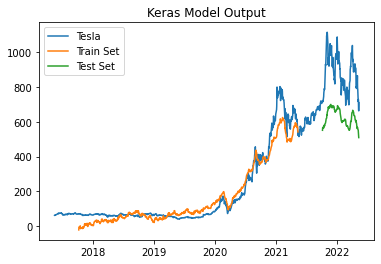

In [25]:
### Plotting 
# Time
time = np.array([df1.index])
time.shape, time[:10]
time = np.transpose(time)

# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(dftsla)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dftsla)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(time, scaler.inverse_transform(dftsla))
plt.plot(time, trainPredictPlot)
plt.plot(time, testPredictPlot)
plt.legend(['Tesla','Train Set','Test Set'])
plt.title('Keras Model Output')
plt.show()

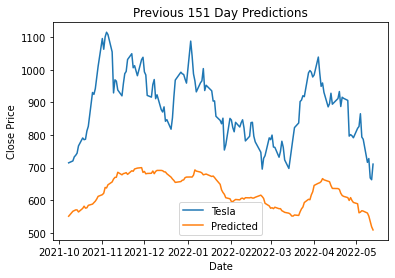

In [26]:
test_predict_length = len(test_predict)
tsla_real_plot = scaler.inverse_transform(dftsla)
plt.title('Previous ' + str(test_predict_length) + ' Day Predictions')
plt.plot(time[-test_predict_length:],tsla_real_plot[-test_predict_length:])
plt.plot(time[-test_predict_length:],test_predict)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(['Tesla','Predicted'])
plt.show()

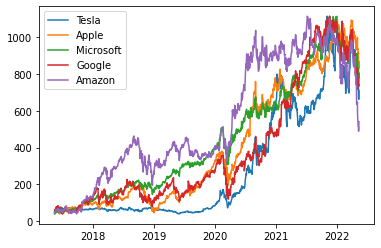

In [27]:
# Compare Real Prices of Each Stock
plt.plot(time,scaler.inverse_transform(dftsla))
plt.plot(time,scaler.inverse_transform(dfaapl))
plt.plot(time,scaler.inverse_transform(dfmsft))
plt.plot(time,scaler.inverse_transform(dfgoog))
plt.plot(time,scaler.inverse_transform(dfamzn))
plt.legend(['Tesla','Apple', 'Microsoft', 'Google', 'Amazon'])
plt.show()

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

242.3644546611397

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

625.9340697400319

References:
- https://towardsdatascience.com/getting-rich-quick-with-machine-learning-and-stock-market-predictions-696802da94fe
- https://towardsdatascience.com/getting-rich-quick-with-machine-learning-and-stock-market-predictions-696802da94fe
- https://youtu.be/H6du_pfuznE
